# <p style='text-align:center'><b><font color = green|>Lasso Regression Algorithm 

<font size=4>Lasso (Least Absolute Shrinkage and Selection Operator) is a linear regression regularization technique used to prevent overfitting and perform feature selection by adding an L1 penalty term to the linear regression equation. Lasso is particularly useful when dealing with datasets containing a large number of features, as it can effectively shrink the less important features' coefficients to zero, effectively removing them from the model.

The regularized linear regression equation using Lasso can be represented as follows:</font>

### $$ y = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n + ε = b_0 + Σ_{k=1}^{n}(b_kx_k) +  ε $$

<font size=4>The regularization term in Lasso is added to the standard least squares loss function (the sum of squared errors) and is proportional to the absolute values of the coefficients:</font>

### $$ Loss\space function = Σ(Squared Errors) + λΣ|bi| $$

<font size=4><font color = green|>where:
- $ y $ is the dependent variable (the predicted value).
- $ x_1, x_2, ..., x_n $ are the independent variables (input features).
- $ b_0, b_1, b_2, ..., b_n $ are the coefficients.
- $ ε $ represents the error term, accounting for the variability not explained by the model.
- $ λ $ (lambda) is the regularization parameter, which controls the strength of the penalty. A larger λ value leads to more shrinkage of coefficients towards zero.</font>

The L1 penalty term has the effect of pushing some of the coefficients to exactly zero, effectively performing feature selection. This means that Lasso can identify and exclude irrelevant or less important features from the model, leading to a more interpretable and efficient model.

Lasso can be useful in situations where the dataset has a large number of features, many of which might not be relevant to the prediction task. By penalizing the model for using unnecessary features, Lasso encourages the model to focus on the most important features for accurate predictions. It is particularly valuable in feature engineering and model building when trying to strike a balance between model complexity and predictive performance.

To find the optimal coefficients and the regularization parameter λ, an optimization algorithm is used, such as coordinate descent or gradient descent. These algorithms minimize the Lasso loss function, finding the best-fitting model that balances the sum of squared errors and the L1 penalty term.

Lasso has been widely used in various fields, including machine learning, statistics, economics, and signal processing, among others. It is an essential tool for feature selection, model regularization, and improving the generalization of linear regression models.

### Iris Dataset

In [4]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd 

# Assuming you have your data loaded and prepared with X (features) and y (target variable)
# Load the Iris dataset
iris = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

# Use 'sepal length' as the independent variable (X) and 'sepal width' as the dependent variable (y)
X = iris['sepal_length'].values.reshape(-1, 1)
y = iris['sepal_width'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for regularization techniques)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the Lasso regression model
alpha = 0.1  # The regularization parameter (lambda)
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = lasso_model.predict(X_test_scaled)

# Calculate the Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Get the coefficients (weights) of the model
coefficients = lasso_model.coef_
print("Model Coefficients:", coefficients)

# Calculate the R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r_squared}")

Mean Squared Error (MSE): 0.1433729166666666
Model Coefficients: [-0.]
R-squared (R²): -0.0021406104380241597


When the R-squared (R²) value is negative, it indicates that the model performs worse than a horizontal line (a model that predicts the mean of the target variable for all observations). This situation is not uncommon when dealing with models that have very poor performance or fitting random data.

A negative R-squared typically occurs when the model's predictions are even worse than simply predicting the mean of the target variable for all data points. It suggests that the model is not capturing any meaningful patterns in the data and is essentially making arbitrary predictions.

There are several reasons why a regression model might yield a negative R-squared:

1. Overfitting: The model might be overfitting the training data, capturing noise or random variations instead of the underlying relationship between the features and the target variable.

2. Underfitting: The model might be too simplistic to capture the actual relationships in the data, resulting in poor predictions.

3. Insufficient or Irrelevant Features: The model might not have enough relevant features to explain the target variable's variability or might be using irrelevant features that do not contribute to the target variable's prediction.

4. Data Issues: The data itself might be noisy, inconsistent, or contain errors, leading to poor model performance.

To address this issue and improve your model's performance, consider the following steps:

1. Feature Engineering: Ensure that you have relevant and meaningful features that can adequately explain the variability in the target variable. Consider including additional features or transforming existing ones.

2. Regularization: If you are using Lasso regression with an overly large regularization parameter (alpha), it might be causing excessive shrinkage of the coefficients, leading to poor model performance. Try different values of alpha to find the optimal regularization strength.

3. Model Selection: Explore other regression models that can better capture the underlying relationships in your data, such as polynomial regression with different degrees, decision trees, random forests, or support vector regression.

4. Data Preprocessing: Check for data issues, such as missing values, outliers, or inconsistent data, and preprocess the data accordingly.

5. Cross-Validation: Use cross-validation techniques to evaluate your model's performance on different subsets of the data and ensure that it generalizes well to unseen data.

It's essential to carefully examine your data, model, and preprocessing steps to identify the reasons for the negative R-squared and make improvements accordingly. Additionally, visualizing the data and the model's predictions can provide valuable insights into potential issues.

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, median_absolute_error
import numpy as np 

# Assuming you have already fitted the model and obtained y_pred and y_test

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate Explained Variance Score (EV)
ev = explained_variance_score(y_test, y_pred)

# Calculate Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Explained Variance Score (EV): {ev}")
print(f"Median Absolute Error (MedAE): {medae}")

Mean Absolute Error (MAE): 0.2943333333333332
Mean Squared Error (MSE): 0.1433729166666666
Root Mean Squared Error (RMSE): 0.37864616288385466
Explained Variance Score (EV): 0.0
Median Absolute Error (MedAE): 0.25749999999999984


### Lasso Regression with House dataset 

In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Step 1: Load and Preprocess the Data
boston = load_boston()
X, y = pd.DataFrame(boston.data, columns=boston.feature_names), boston.target
X

c:\Users\LH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cal

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [23]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [26]:
# Step 2: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [27]:
X_train_scaled

array([[ 1.28770177, -0.50032012,  1.03323679, ...,  0.84534281,
        -0.07433689,  1.75350503],
       [-0.33638447, -0.50032012, -0.41315956, ...,  1.20474139,
         0.4301838 , -0.5614742 ],
       [-0.40325332,  1.01327135, -0.71521823, ..., -0.63717631,
         0.06529747, -0.65159505],
       ...,
       [-0.40547014,  2.95931752, -1.30336132, ..., -0.59225149,
         0.37901005, -0.91069248],
       [ 0.85189733, -0.50032012,  1.03323679, ...,  0.84534281,
        -2.69458597,  1.52257036],
       [-0.38135592, -0.50032012, -0.35216694, ...,  1.15981657,
        -3.12158061, -0.25731635]])

In [25]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37
436,14.42080,0.0,18.10,0.0,0.740,6.461,93.3,2.0026,24.0,666.0,20.2,27.49,18.05
411,14.05070,0.0,18.10,0.0,0.597,6.657,100.0,1.5275,24.0,666.0,20.2,35.05,21.22
86,0.05188,0.0,4.49,0.0,0.449,6.015,45.1,4.4272,3.0,247.0,18.5,395.99,12.86


In [28]:
X_test_scaled

array([[-0.39680933, -0.50032012, -1.00711147, ..., -0.77195078,
         0.42887165, -0.48121032],
       [-0.40079621,  1.2294987 , -0.66439105, ..., -0.32270256,
         0.44418004, -1.25709448],
       [-0.39523443, -0.50032012,  2.43316256, ...,  0.80041799,
         0.36993437,  0.79033849],
       ...,
       [ 1.1779666 , -0.50032012,  1.03323679, ...,  0.84534281,
        -3.5124912 ,  1.23390203],
       [-0.40131065, -0.50032012, -0.94321444, ...,  0.08162084,
         0.43422959,  0.05669848],
       [-0.39643252, -0.50032012,  0.26792466, ...,  0.17147048,
         0.29470458, -0.49529171]])

In [29]:
# Step 4: Create and Fit the Lasso Regression Model
alpha = 0.1  # Set the regularization parameter (lambda)
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_scaled, y_train)

# Step 5: Make Predictions
y_pred = lasso_model.predict(X_test_scaled)
y_pred

array([28.61848398, 34.63632925, 17.53529178, 24.88556695, 18.58518408,
       23.70918577, 17.97514976, 15.01202114, 22.33803287, 20.9600054 ,
       24.09619986, 19.39170602, -5.25508233, 22.41912563, 19.38013212,
       25.65227765, 19.22675375,  5.3804076 , 39.1630395 , 17.53503838,
       26.28519477, 28.72767985, 12.07724779, 24.41147859, 17.61174608,
       15.17385869, 23.06864639, 15.07995487, 22.22360846, 19.57418247,
       21.91589282, 25.27106985, 25.86841869, 17.45627445, 16.15279833,
       17.91938254, 31.6070092 , 19.9790229 , 23.51029759, 24.52659688,
       14.23005669, 30.49071029, 40.52867933, 17.99101587, 27.30787759,
       16.5712319 , 14.64288646, 25.82015853, 19.73653932, 30.51046878,
       21.87274167, 33.34522913, 16.71082215, 26.79394152, 38.62449149,
       22.20099241, 18.67336418, 30.98286869, 25.07511854, 13.56703489,
       22.92004591, 29.61475932, 30.55939253, 16.12804781, 22.46591911,
       16.44371615, 20.20491267, 25.64918125, 29.32186576, 11.80

In [30]:
# Step 6: Evaluate the Model
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R-squared (R²): {r_squared}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared (R²): 0.6501375183238987
Mean Absolute Error (MAE): 3.2418034658794657
Mean Squared Error (MSE): 25.65673936716768
Root Mean Squared Error (RMSE): 5.065248203905479


In [31]:
# Step 7: Feature Selection
coefficients = lasso_model.coef_
selected_features = X.columns[coefficients != 0]
print("Selected Features:", selected_features)

Selected Features: Index(['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')


Feature Importance (sorted by absolute coefficient value):
LSTAT      3.609410
RM         3.271507
DIS        2.284449
PTRATIO    1.893335
NOX        1.568142
B          1.031366
CRIM       0.718365
CHAS       0.698221
RAD        0.671938
TAX        0.356654
ZN         0.259627
INDUS      0.000000
AGE        0.000000
dtype: float64


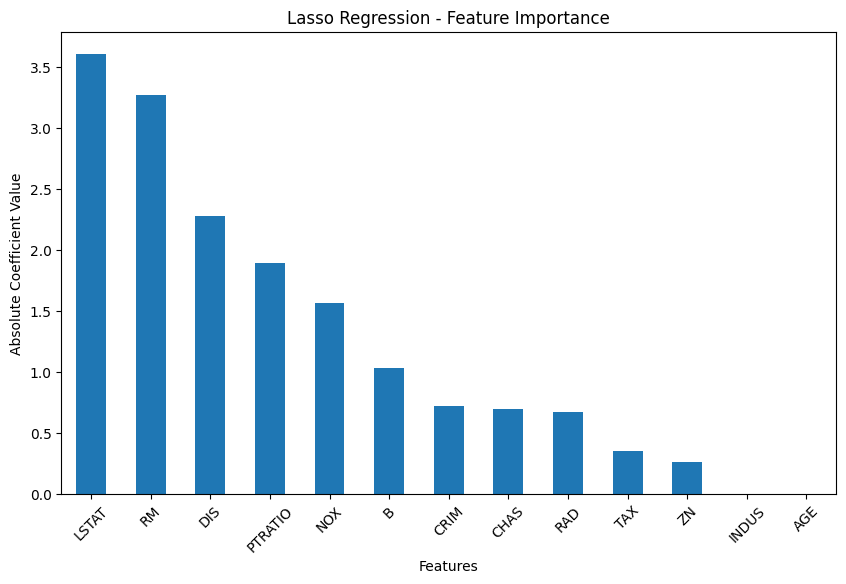

In [33]:
# Step 8: Interpret the Results
# Analyze the model's performance and the importance of different features to gain insights into what factors contribute the most to house prices.

# Analyzing Model Coefficients (Feature Importance)
coefficients = lasso_model.coef_
feature_importance = pd.Series(coefficients, index=X.columns)

# Sorting the features by their absolute coefficient values in descending order
sorted_feature_importance = feature_importance.abs().sort_values(ascending=False)

print("Feature Importance (sorted by absolute coefficient value):")
print(sorted_feature_importance)

# Visualizing the Feature Importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sorted_feature_importance.plot(kind='bar')
plt.title("Lasso Regression - Feature Importance")
plt.xlabel("Features")
plt.ylabel("Absolute Coefficient Value")
plt.xticks(rotation=45)
plt.show()


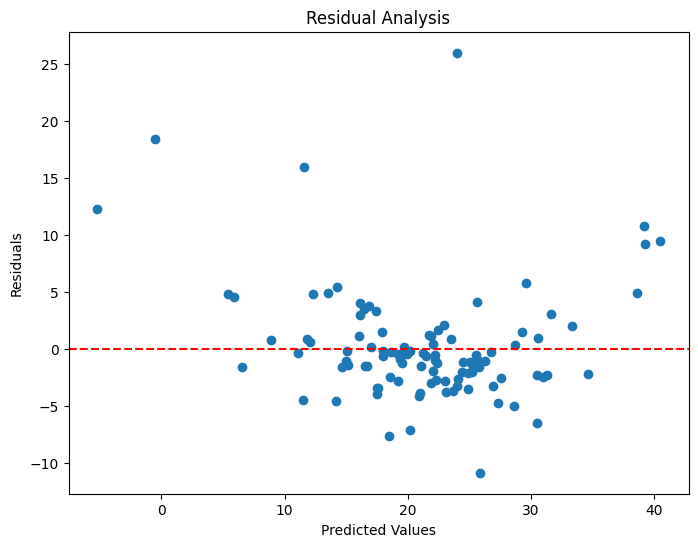

In [34]:
# Calculate the residuals
residuals = y_test - y_pred

# Scatter plot of residuals vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()


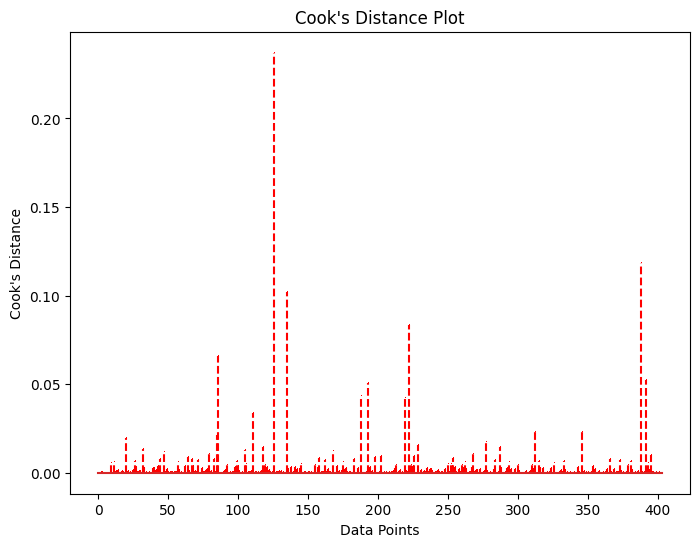

In [39]:
from statsmodels.stats.outliers_influence import OLSInfluence
import statsmodels.api as sm

# Fit the linear regression model (using statsmodels for Cook's Distance)
model_stats = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()
influence = model_stats.get_influence()
cooks_distance = influence.cooks_distance[0]

# Plot Cook's distance
plt.figure(figsize=(8, 6))
plt.stem(cooks_distance, markerfmt=",", linefmt='r--')
plt.xlabel("Data Points")
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show()


c:\Users\LH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


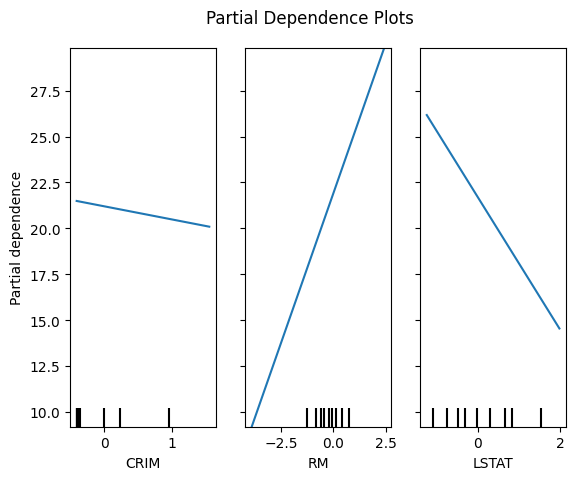

In [37]:
from sklearn.inspection import plot_partial_dependence

# Plot partial dependence for selected features
features_to_plot = [0, 5, 12]  # Index of features to plot (change as needed)
plot_partial_dependence(lasso_model, X_test_scaled, features=features_to_plot, feature_names=X.columns)
plt.suptitle("Partial Dependence Plots")
plt.subplots_adjust(top=0.9)
plt.show()


In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factor (VIF):")
print(vif)


Variance Inflation Factor (VIF):
   Features        VIF
0      CRIM   2.100373
1        ZN   2.844013
2     INDUS  14.485758
3      CHAS   1.152952
4       NOX  73.894947
5        RM  77.948283
6       AGE  21.386850
7       DIS  14.699652
8       RAD  15.167725
9       TAX  61.227274
10  PTRATIO  85.029547
11        B  20.104943
12    LSTAT  11.102025
